In [6]:
!pip install opencv-python

In [7]:
import cv2
import matplotlib.pyplot as plt

In [4]:
image_bgr = cv2.imread("images/plane.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Resize

In [9]:
image = cv2.imread("images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)

# Crop images

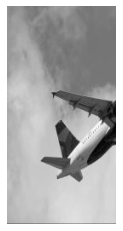

In [10]:
image_cropped = image[:,:128]
plt.imshow(image_cropped, cmap="gray")
plt.axis("off")
plt.show()

# Saving images

In [11]:
image = cv2.imread("images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imwrite("images/plane_new.jpg", image)

True

# Dimensional Reduction

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [13]:
digits = datasets.load_digits()
features = StandardScaler().fit_transform(digits.data)
pca = PCA(n_components = 0.99, whiten = True)
features_pca = pca.fit_transform(features)

In [15]:
print(f"Original number of features {features.shape[1]}")
print(f"Reduced number of features {features_pca.shape[1]}")

Original number of features 64
Reduced number of features 54


## Kernel PCA

In [16]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [17]:
# Create linearly inseparable data
features, _ = make_circles(n_samples= 1000, random_state = 1, noise= 0.1, factor= 0.1)
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)

In [18]:
print(f"Original number of features {features.shape[1]}")
print(f"Reduced number of features {features_kpca.shape[1]}")

Original number of features 2
Reduced number of features 1


## Linear Discriminant Analysis LDA

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets

In [20]:
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [21]:
lda = LinearDiscriminantAnalysis(n_components = 1)
features_lda = lda.fit(features, target).transform(features)

In [22]:
print(f"Original number of features {features.shape[1]}")
print(f"Reduced number of features {features_lda.shape[1]}")

Original number of features 4
Reduced number of features 1


In [23]:
lda.explained_variance_ratio_

array([0.9912126])

# Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [25]:
boston = load_boston()
features = boston.data[:,0:2]
target = boston.target

C:\tools\Anaconda3\envs\College\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

In [27]:
regression = LinearRegression()
model = regression.fit(features, target)

In [28]:
model.intercept_

22.485628113468223

In [29]:
model.coef_

array([-0.35207832,  0.11610909])

## Interaction Features

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
boston = load_boston()
features = boston.data[:,0:2]
target = boston.target

C:\tools\Anaconda3\envs\College\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

In [33]:
interaction = PolynomialFeatures(
    degree= 3,
    include_bias = False,
    interaction_only = True
)
features_interaction = interaction.fit_transform(features)